# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')
data = data.append(data_r.assign(type = 'red'), ignore_index=True)

data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5750,8.0,0.42,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5,red
505,7.8,0.18,0.31,12.2,0.053,46.0,140.0,0.99800,3.06,0.53,8.9,6,white
462,5.9,0.25,0.19,12.4,0.047,50.0,162.0,0.99730,3.35,0.38,9.5,5,white
2555,6.3,0.13,0.42,1.1,0.043,63.0,146.0,0.99066,3.13,0.72,11.2,7,white
3477,7.6,0.31,0.24,1.8,0.037,39.0,150.0,0.99130,3.05,0.44,11.8,7,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [4]:
pd.pivot_table(data, index=['type', 'quality'], aggfunc={'quality': len})

quality
type  quality         
red   3             10
      4             53
      5            681
      6            638
      7            199
      8             18
white 3             20
      4            163
      5           1457
      6           2198
      7            880
      8            175
      9              5

# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In order to create the two linear SVMs, will split the dataset in two. One for **red** wine and the other for **white** wine.

In [5]:
wine = data

wine_r = wine[wine['type'] == 'red']
wine_w = wine[wine['type'] == 'white']

wine_r.reset_index(inplace=True)
wine_w.reset_index(inplace=True)

* #### Create a binary target for each type of wine

For each dataset, will specify the binary target. In this case, will be consider a good wine (high quality) if superior of the threshold. In this case will be set the threshold for: **7**

In [6]:
# Create the binary target

wine_r["target"] = wine['quality'] >= 7
wine_w["target"] = wine['quality'] >= 7

In [7]:
wine_r.sample(5)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,target
1091,5989,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,11.4,6,red,False
578,5476,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5,red,True
1458,6356,8.4,0.29,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.5,5,red,False
713,5611,8.0,0.43,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,5,red,False
284,5182,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5,red,False


In [8]:
wine_w.sample(5)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,target
359,359,6.9,0.240,0.34,4.7,0.040,43.0,161.0,0.99350,3.20,0.59,10.6,6,white,False
1412,1412,6.9,0.300,0.33,4.1,0.035,26.0,155.0,0.99250,3.25,0.79,12.3,8,white,True
3249,3249,6.4,0.230,0.35,4.6,0.039,43.0,147.0,0.99216,3.18,0.40,11.0,7,white,True
4611,4611,5.9,0.420,0.36,2.4,0.034,19.0,77.0,0.99184,3.25,0.48,10.9,5,white,False
2630,2630,5.9,0.445,0.26,1.4,0.027,23.0,109.0,0.99148,3.30,0.36,10.5,6,white,False


* #### Standarized the features (not the quality)

In [9]:
    # Because the "Target" is a result of a direct comparisson of "Quality", this feature will be remove.
    # Will be remove other variables that does not belongs to the X matrix of features.
    
X_winered = wine_r.drop(['index','quality','type','target'],axis=1)
X_winewhite = wine_w.drop(['index','quality','type','target'],axis=1)

    # Is required to specify which is the y matrix.
    
y_winered = wine_r['target']
y_winewhite = wine_w['target']

Before to create the SVM, is necessary to standardize the features (or Independent variables). Then, split the dataset for Training either Test.

In [10]:
from sklearn import preprocessing

# Standardize the features

X_r_s = preprocessing.scale(X_winered)
X_w_s = preprocessing.scale(X_winewhite)

* #### Create two Linear SVM's for the white and red wines, repectively.

In [11]:
from sklearn.model_selection import train_test_split

# Create a training and test dataset

X_r_s_train, X_r_s_test, y_r_train, y_r_test = train_test_split(X_r_s, y_winered, random_state=1)
X_w_s_train, X_w_s_test, y_w_train, y_w_test = train_test_split(X_w_s, y_winewhite, random_state=1)

In this first approach, will be use the kernel : **linear**

    Model for Wines type "Red" with kernel = Linear

In [12]:
from sklearn.svm import SVC

clf_r = SVC(kernel='linear')
clf_r.fit(X_r_s_train, y_r_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

     Model for Wines type "White" with kernel = Linear

In [13]:
clf_w = SVC(kernel='linear')
clf_w.fit(X_w_s_train, y_w_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let´s test this new model!

In [14]:
y_r_pred = clf_r.predict(X_r_s_test)
y_w_pred = clf_w.predict(X_w_s_test)

Now... let's do the math to check if the models are adequate

In [15]:
from sklearn import metrics

Acc_Wine_r = metrics.accuracy_score(y_r_test, y_r_pred)
Acc_Wine_w = metrics.accuracy_score(y_w_test, y_w_pred)

print("\n")
print("The calculated accuracy for Wines type 'Red' is: " + str(np.round(Acc_Wine_r,decimals=4)))
print("The calculated accuracy for Wines type 'White' is: " + str(np.round(Acc_Wine_w,decimals=4)))



The calculated accuracy for Wines type 'Red' is: 0.7775
The calculated accuracy for Wines type 'White' is: 0.7763


# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


Now, will be use the same technique to estimate (for each type of wine) the SVM with the following kernels:
* poly
* rbf
* sigmoid

The analysis will be divide in the following stages:
1. **Model creation**
2. **Model prediction**
3. **Accuracy calculator**
4. **Results comparison**

* #### Model creation

In [16]:
# Kernel = poly
clf_r_poly = SVC(kernel='poly')
clf_r_poly.fit(X_r_s_train, y_r_train)
clf_w_poly = SVC(kernel='poly')
clf_w_poly.fit(X_w_s_train, y_w_train)

# Kernel = rbf
clf_r_rbf = SVC(kernel='rbf')
clf_r_rbf.fit(X_r_s_train, y_r_train)
clf_w_rbf = SVC(kernel='rbf')
clf_w_rbf.fit(X_w_s_train, y_w_train)

# Kernel = sigmoid
clf_r_sigmoid = SVC(kernel='sigmoid')
clf_r_sigmoid.fit(X_r_s_train, y_r_train)
clf_w_sigmoid = SVC(kernel='sigmoid')
clf_w_sigmoid.fit(X_w_s_train, y_w_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* #### Model prediction

In [17]:
y_r_pred_poly = clf_r_poly.predict(X_r_s_test)
y_w_pred_poly = clf_w_poly.predict(X_w_s_test)

y_r_pred_rbf = clf_r_rbf.predict(X_r_s_test)
y_w_pred_rbf = clf_w_rbf.predict(X_w_s_test)

y_r_pred_sigmoid = clf_r_sigmoid.predict(X_r_s_test)
y_w_pred_sigmoid = clf_w_sigmoid.predict(X_w_s_test)

* #### Accuracy calculator

In [18]:
Acc_Wine_r_poly = metrics.accuracy_score(y_r_test, y_r_pred_poly)
Acc_Wine_w_poly = metrics.accuracy_score(y_w_test, y_w_pred_poly)

Acc_Wine_r_rbf = metrics.accuracy_score(y_r_test, y_r_pred_rbf)
Acc_Wine_w_rbf = metrics.accuracy_score(y_w_test, y_w_pred_rbf)

Acc_Wine_r_sigmoid = metrics.accuracy_score(y_r_test, y_r_pred_sigmoid)
Acc_Wine_w_sigmoid = metrics.accuracy_score(y_w_test, y_w_pred_sigmoid)

* #### Results comparison

In [19]:
print("\n")

print("For the Wine type 'Red', the accuracy of each kernel is:")
print("linear: " + str(np.round(Acc_Wine_r,decimals = 5)))
print("poly: " + str(np.round(Acc_Wine_r_poly,decimals = 5)))
print("rbf: " + str(np.round(Acc_Wine_r_rbf,decimals = 5)))
print("sigmoid: " + str(np.round(Acc_Wine_r_sigmoid,decimals = 5)))

print("\n")

print("For the Wine type 'White', the accuracy of each kernel is:")
print("linear: " + str(np.round(Acc_Wine_w,decimals = 5)))
print("poly: " + str(np.round(Acc_Wine_w_poly,decimals = 5)))
print("rbf: " + str(np.round(Acc_Wine_w_rbf,decimals = 5)))
print("sigmoid: " + str(np.round(Acc_Wine_w_sigmoid,decimals = 5)))

print("\n")



For the Wine type 'Red', the accuracy of each kernel is:
linear: 0.7775
poly: 0.775
rbf: 0.7775
sigmoid: 0.68


For the Wine type 'White', the accuracy of each kernel is:
linear: 0.77633
poly: 0.80245
rbf: 0.82449
sigmoid: 0.73551




Using the result obtained above, the models with the kernel = **rbf** are the models with the highest accuracy score.

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

According the previous result, the kernel that gives the best accuracy is **rbf**.

In [20]:
# Parameters to interate.

C_param = [0.1, 1, 10, 100, 1000]
gamma_param = [0.1, 0.01, 0.001, 0.0001]

* #### Model for Wine : Red

In [21]:
R = np.zeros((len(C_param), len(gamma_param)))

for i in range(len(C_param)):
    for j in range(len(gamma_param)):
        clfr = SVC(kernel="rbf", C=C_param[i], gamma=gamma_param[j])
        clfr.fit(X_r_s_train, y_r_train) 
        R[i,j] = metrics.accuracy_score(y_r_test, clfr.predict(X_r_s_test))

Matrix_R = pd.DataFrame(R)
Matrix_R

,0,1,2,3
0,0.7775,0.7775,0.7775,0.7775
1,0.7775,0.7775,0.7775,0.7775
2,0.7650,0.7775,0.7775,0.7775
3,0.7075,0.7750,0.7775,0.7775
4,0.6700,0.7650,0.7775,0.7775


* #### Model for Wine : White

In [22]:
W = np.zeros((len(C_param), len(gamma_param)))

for i in range(len(C_param)):
    for j in range(len(gamma_param)):
        clfw = SVC(kernel="rbf", C=C_param[i], gamma=gamma_param[j])
        clfw.fit(X_w_s_train, y_w_train) 
        W[i,j] = metrics.accuracy_score(y_w_test, clfw.predict(X_w_s_test))

Matrix_W = pd.DataFrame(W)
Matrix_W       

,0,1,2,3
0,0.799184,0.776327,0.776327,0.776327
1,0.823673,0.782857,0.776327,0.776327
2,0.835918,0.812245,0.776327,0.776327
3,0.844082,0.824490,0.791837,0.776327
4,0.844082,0.823673,0.808980,0.776327


In [23]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))

Ax1 = ax1.matshow(Matrix_R, cmap=plt.cm.Reds)
ax1.set_title('Accuracy - Wine Red')
ax1.set_xlabel('Gamma parameter')
ax1.set_ylabel('C parameter')
ax1.set_xticks(np.arange(len(gamma_param)))
ax1.set_yticks(np.arange(len(C_param)))
ax1.set_xticklabels(gamma_param)
ax1.set_yticklabels(C_param)


Ax2 = ax2.matshow(Matrix_W, cmap=plt.cm.Blues)
ax2.set_title('Accuracy - Wine White')
ax2.set_xlabel('Gamma parameter')
ax2.set_ylabel('C parameter')
ax2.set_xticks(np.arange(len(gamma_param)))
ax2.set_yticks(np.arange(len(C_param)))
ax2.set_xticklabels(gamma_param)
ax2.set_yticklabels(C_param)

f.colorbar(Ax2)
f.colorbar(Ax1)

f.show()

The accuracy depends of the model!  Is a fact that between a hight C and a lower Gamma, the accuracy can be improved, not necessary will implies the best model.

# Exercise 6.5

Compare the results with other methods

In order to compare the results, will be create a logistic regression.

* Logistic model for Wine : Red

In [24]:
from sklearn.linear_model import LogisticRegression

logreg_r = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logreg_r.fit(X_r_s_train, y_r_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

* Logistic model for Wine : White

In [25]:
logreg_w = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logreg_w.fit(X_w_s_train, y_w_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

* #### Accuracy calculator and results

* Comparisson for Wine : Red

In [26]:
print("Comparisson for Wine : Red")
print("\n")

print("Accuracy for a Logistic model: ")
print(np.round(metrics.accuracy_score(y_r_test, logreg_r.predict(X_r_s_test)), decimals=4))

print("\n")
print("Worst accuracy for a linear model: ")
print(np.round(Matrix_R.min().min(), decimals=4))

print("\n")
print("Best accuracy for a linear model: ")
print(np.round(Matrix_R.max().max(), decimals=4))

Comparisson for Wine : Red


Accuracy for a Logistic model: 
0.7775


Worst accuracy for a linear model: 
0.67


Best accuracy for a linear model: 
0.7775


* Comparisson for Wine : White

In [27]:
print("Comparisson for Wine : White")
print("\n")

print("Accuracy for a Logistic model: ")
print(np.round(metrics.accuracy_score(y_w_test, logreg_w.predict(X_w_s_test)), decimals=4))

print("\n")
print("Worst accuracy for a linear model: ")
print(np.round(Matrix_W.min().min(), decimals=4))

print("\n")
print("Best accuracy for a linear model: ")
print(np.round(Matrix_W.max().max(), decimals=4))

Comparisson for Wine : White


Accuracy for a Logistic model: 
0.7951


Worst accuracy for a linear model: 
0.7763


Best accuracy for a linear model: 
0.8441


That means that the Logistic model have a good approximation in comparisson to the best linear model obtained modifying the parameters C and gamma

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

* #### Train a *linear* regression to predict wine quality (Continous)

From the **Exercise 6.2**, we should clean and standardize the features.

In [28]:
# Create a new dataset that won't impact with the data analysis made in the exercises above.

wine66 = data

wine66_r = wine66[wine66['type'] == 'red']
wine66_w = wine66[wine66['type'] == 'white']

wine66_r.reset_index(inplace=True)
wine66_w.reset_index(inplace=True)

In [29]:
wine66_r.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
wine66_w.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In order to train the linear regression model, the dataset will split in:
* X matrix for independent variables
* y matrix for dependent variable

In [31]:
X_wine66_red = wine66_r.drop(['index','quality','type'],axis=1)
X_wine66_white = wine66_w.drop(['index','quality','type'],axis=1)

y_wine66_red = wine66_r['quality']
y_wine66_white = wine66_w['quality']

Before to train the linear regression model, is required to standardize the features.

In [32]:
# Standardize the features

X66_r_s = preprocessing.scale(X_winered)
X66_w_s = preprocessing.scale(X_winewhite)

In [33]:
# Create a training and test dataset

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X66_r_s, y_wine66_red, random_state=1)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X66_w_s, y_wine66_white, random_state=1)

    # Normalized
X_r_s_train, X_r_s_test, y_r_s_train, y_r_s_test = train_test_split(X66_r_s, y_wine66_red, random_state=1)
X_w_s_train, X_w_s_test, y_w_s_train, y_w_s_test = train_test_split(X66_w_s, y_wine66_white, random_state=1)

... Creating a Linear model using *sklearn*

In [34]:
from sklearn.linear_model import LinearRegression

* #### Linear model for wines type: "Red"

In [35]:
linreg_r = LinearRegression()
linreg_r.fit(X_r_s_train, y_r_s_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* #### Linear model for wines type: "White"

In [36]:
linreg_w = LinearRegression()
linreg_w.fit(X_w_s_train, y_w_s_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* #### Analyze the coefficients

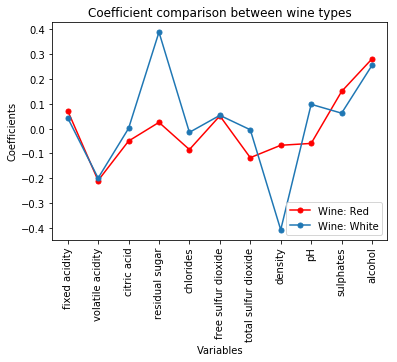

In [37]:
LinMod = pd.DataFrame()
LinMod[0] = linreg_r.coef_
LinMod[1] = linreg_w.coef_

plt.plot(LinMod[0], marker='o', markersize=5, color='red')
plt.plot(LinMod[1], marker='o', markersize=5)
plt.title('Coefficient comparison between wine types')
plt.ylabel('Coefficients')
plt.xlabel('Variables')
plt.xticks(np.arange(len(X_winered.columns)), X_winered.columns, rotation=90 )
plt.legend(('Wine: Red', 'Wine: White'),loc='lower right')
plt.show()

As a result of this model, is important to highlight the following:

* For both type of wines, the following are the most relevant caractheristics in order to determinate a good wine:
    * sulphates
    * alcohol
    
    
* For both type of wines, the following are the less relevant caractheristic in order to determinate a good wine:
    * volatile acidity
    
    
* For the wines "white" the most relevant item in order to determinate the quality is:
    * Residual sugar 


* For the wines "white" the less relevant item in order to determinate the quality is:
    * density

* #### Evaluate the RMSE

In order to calculate the RMSE, we requires to calculate the prediction with the test dataset for each type of wine and compare with the correct result.

In [38]:
# RMSE calculation

RMSE_r_linear_reg = np.sqrt(metrics.mean_squared_error(y_r_s_test, linreg_r.predict(X_r_s_test)))
RMSE_w_linear_reg = np.sqrt(metrics.mean_squared_error(y_w_s_test, linreg_w.predict(X_w_s_test)))

print("The RMSE of the linear models for each type of wine is: ")
print("\n")
print("Wine type RED is: "+ str(np.round(RMSE_r_linear_reg, decimals = 5)))
print("Wine type WHITE is: "+ str(np.round(RMSE_w_linear_reg, decimals = 5)))

The RMSE of the linear models for each type of wine is: 


Wine type RED is: 0.62176
Wine type WHITE is: 0.73006


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

* #### Estimate a ridge regression with alpha equals 0.1 and 1.

In order to make the results comparable, will be use the same dataset for training and test (without standarzide).

The dataset to be use, will be:

#### Independent variables

* ***Training purpose***
    * wine66_r_training
    * wine66_w_training
* ***Test purpose***
    * wine66_r_test
    * wine66_w_test

#### Dependent variables

* ***Training purpose***
    * y_r
    * y_w
* ***Test purpose***
    * y66_r_p
    * y66_w_p

In [39]:
from sklearn.linear_model import Ridge

### With: $\alpha = 0.1$

1. #### Ridge model for wines type: "Red"

In [40]:
ridgereg_r01 = Ridge(alpha=0.1, normalize=True)
ridgereg_r01.fit(X_r_train, y_r_train)
ridgereg_r01.coef_

array([ 0.06286371, -0.18622534, -0.012416  ,  0.02394328, -0.08110505,
        0.03848472, -0.10525858, -0.07605435, -0.04317083,  0.13816317,
        0.25082262])

2. #### Ridge model for wines type: "White"

In [41]:
ridgereg_w01 = Ridge(alpha=0.1, normalize=True)
ridgereg_w01.fit(X_w_train, y_w_train)
ridgereg_w01.coef_

array([-0.01832305, -0.17868556,  0.00332953,  0.175281  , -0.04110753,
        0.06135738, -0.02330528, -0.14001362,  0.04548148,  0.04368789,
        0.31840358])

### With: $\alpha = 1$

1. #### Ridge model for wines type: "Red"

In [42]:
ridgereg_r1 = Ridge(alpha=1, normalize=True)
ridgereg_r1.fit(X_r_train, y_r_train)
ridgereg_r1.coef_

array([ 0.03069975, -0.11717229,  0.03744883,  0.01001993, -0.04930449,
        0.00380574, -0.05881262, -0.05956891, -0.0153926 ,  0.0806392 ,
        0.15192335])

2. #### Ridge model for wines type: "White"

In [43]:
ridgereg_w1 = Ridge(alpha=1, normalize=True)
ridgereg_w1.fit(X_w_train, y_w_train)
ridgereg_w1.coef_

array([-0.02610017, -0.09119149,  0.00712546,  0.03369428, -0.05619761,
        0.03108778, -0.02881895, -0.07152769,  0.02573261,  0.02353068,
        0.16073028])

* #### Compare the coefficients with the linear regression

1. ### Wine type: Red

In [44]:
Coef_r = pd.DataFrame()
Coef_r[0] = linreg_r.coef_
Coef_r[1] = ridgereg_r01.coef_
Coef_r[2] = ridgereg_r1.coef_

Coef_r.set_index(X_wine66_red.columns, inplace=True)
Coef_r.rename({0 : "Linear", 1 : "Ridge_Alpha_0.1", 2 : "Ridge_Alpha_1"}, axis=1, inplace=True)

Coef_r

,Linear,Ridge_Alpha_0.1,Ridge_Alpha_1
fixed acidity,0.072594,0.062864,0.030700
volatile acidity,-0.208842,-0.186225,-0.117172
citric acid,-0.049952,-0.012416,0.037449
residual sugar,0.025345,0.023943,0.010020
chlorides,-0.084111,-0.081105,-0.049304
free sulfur dioxide,0.051536,0.038485,0.003806
total sulfur dioxide,-0.116801,-0.105259,-0.058813
density,-0.066891,-0.076054,-0.059569
pH,-0.059423,-0.043171,-0.015393
sulphates,0.149749,0.138163,0.080639


2. ### Wine type: White

In [45]:
Coef_w = pd.DataFrame()
Coef_w[0] = linreg_w.coef_
Coef_w[1] = ridgereg_w01.coef_
Coef_w[2] = ridgereg_w1.coef_

Coef_w.set_index(X_wine66_red.columns, inplace=True)
Coef_w.rename({0 : "Linear", 1 : "Ridge_Alpha_0.1", 2 : "Ridge_Alpha_1"}, axis=1, inplace=True)

Coef_w

,Linear,Ridge_Alpha_0.1,Ridge_Alpha_1
fixed acidity,0.043723,-0.018323,-0.026100
volatile acidity,-0.198924,-0.178686,-0.091191
citric acid,0.000782,0.003330,0.007125
residual sugar,0.388644,0.175281,0.033694
chlorides,-0.014862,-0.041108,-0.056198
free sulfur dioxide,0.053593,0.061357,0.031088
total sulfur dioxide,-0.004480,-0.023305,-0.028819
density,-0.407168,-0.140014,-0.071528
pH,0.098035,0.045481,0.025733
sulphates,0.062298,0.043688,0.023531


* #### Evaluate the RMSE

The RMSE evaluation will take place at the end of the Exercise 6.8

# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

* #### Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.

In order to make the results comparable, will be use the same dataset for training and test (without standarzide) that was obtained in the Exercise 6.6 and Exercise 6.7

The dataset to be use, will be:

#### Independent variables

* ***Training purpose***
    * wine66_r_training
    * wine66_w_training
* ***Test purpose***
    * wine66_r_test
    * wine66_w_test

#### Dependent variables

* ***Training purpose***
    * y_r
    * y_w
* ***Test purpose***
    * y66_r_p
    * y66_w_p

In [46]:
from sklearn.linear_model import Lasso

### With: $\alpha = 0.001$

1. #### Lasso model for wines type: "Red"

In [47]:
lassoreg_r0001 = Lasso(alpha=0.001, normalize=True)
lassoreg_r0001.fit(X_r_train, y_r_train)
lassoreg_r0001.coef_

array([ 0.        , -0.19696274,  0.        , -0.        , -0.03554431,
        0.        , -0.05327621, -0.        , -0.0226142 ,  0.09604027,
        0.28920733])

2. #### Lasso model for wines type: "White"

In [48]:
lassoreg_w0001 = Lasso(alpha=0.001, normalize=True)
lassoreg_w0001.fit(X_w_train, y_w_train)
lassoreg_w0001.coef_

array([-0.0016476 , -0.14434816, -0.        ,  0.01296694, -0.        ,
        0.00760351,  0.        , -0.        ,  0.        ,  0.        ,
        0.3421803 ])

### With: $\alpha = 0.01$

1. #### Lasso model for wines type: "Red"

In [49]:
lassoreg_r001 = Lasso(alpha=0.01, normalize=True)
lassoreg_r001.fit(X_r_train, y_r_train)
lassoreg_r001.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.04155204])

2. #### Lasso model for wines type: "White"

In [50]:
lassoreg_w001 = Lasso(alpha=0.01, normalize=True)
lassoreg_w001.fit(X_w_train, y_w_train)
lassoreg_w001.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.])

### With: $\alpha = 0.1$

1. #### Lasso model for wines type: "Red"

In [51]:
lassoreg_r01 = Lasso(alpha=0.1, normalize=True)
lassoreg_r01.fit(X_r_train, y_r_train)
lassoreg_r01.coef_

array([ 0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.])

2. #### Lasso model for wines type: "White"

In [52]:
lassoreg_w01 = Lasso(alpha=0.1, normalize=True)
lassoreg_w01.fit(X_w_train, y_w_train)
lassoreg_w01.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.])

### With: $\alpha = 1$

1. #### Lasso model for wines type: "Red"

In [53]:
lassoreg_r1 = Lasso(alpha=1, normalize=True)
lassoreg_r1.fit(X_r_train, y_r_train)
lassoreg_r1.coef_

array([ 0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.])

2. #### Lasso model for wines type: "White"

In [54]:
lassoreg_w1 = Lasso(alpha=1, normalize=True)
lassoreg_w1.fit(X_w_train, y_w_train)
lassoreg_w1.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.])

* #### Compare the coefficients with the linear regression

Will be use the same matrix created in the Exercise 6.7 in order to compare all the coefficients

1. ### Wine type: Red

In [55]:
Coef_r[3] = lassoreg_r0001.coef_
Coef_r[4] = lassoreg_r001.coef_
Coef_r[5] = lassoreg_r01.coef_
Coef_r[6] = lassoreg_r1.coef_

Coef_r.rename({3 : "Lasso_Alpha_0.001", 
               4 : "Lasso_Alpha_0.01", 
               5 : "Lasso_Alpha_0.1", 
               6 : "Lasso_Alpha_1"}, axis=1, inplace=True)

Coef_r

,Linear,Ridge_Alpha_0.1,Ridge_Alpha_1,Lasso_Alpha_0.001,Lasso_Alpha_0.01,Lasso_Alpha_0.1,Lasso_Alpha_1
fixed acidity,0.072594,0.062864,0.030700,0.000000,0.000000,0.0,0.0
volatile acidity,-0.208842,-0.186225,-0.117172,-0.196963,-0.000000,-0.0,-0.0
citric acid,-0.049952,-0.012416,0.037449,0.000000,0.000000,0.0,0.0
residual sugar,0.025345,0.023943,0.010020,-0.000000,0.000000,0.0,0.0
chlorides,-0.084111,-0.081105,-0.049304,-0.035544,-0.000000,-0.0,-0.0
free sulfur dioxide,0.051536,0.038485,0.003806,0.000000,-0.000000,-0.0,-0.0
total sulfur dioxide,-0.116801,-0.105259,-0.058813,-0.053276,-0.000000,-0.0,-0.0
density,-0.066891,-0.076054,-0.059569,-0.000000,-0.000000,-0.0,-0.0
pH,-0.059423,-0.043171,-0.015393,-0.022614,-0.000000,-0.0,-0.0
sulphates,0.149749,0.138163,0.080639,0.096040,0.000000,0.0,0.0


2. ### Wine type: White

In [56]:
Coef_w[3] = lassoreg_w001.coef_
Coef_w[4] = lassoreg_w001.coef_
Coef_w[5] = lassoreg_w01.coef_
Coef_w[6] = lassoreg_w1.coef_

Coef_w.rename({3 : "Lasso_Alpha_0.001", 
               4 : "Lasso_Alpha_0.01", 
               5 : "Lasso_Alpha_0.1", 
               6 : "Lasso_Alpha_1"}, axis=1, inplace=True)

Coef_w

,Linear,Ridge_Alpha_0.1,Ridge_Alpha_1,Lasso_Alpha_0.001,Lasso_Alpha_0.01,Lasso_Alpha_0.1,Lasso_Alpha_1
fixed acidity,0.043723,-0.018323,-0.026100,-0.0,-0.0,-0.0,-0.0
volatile acidity,-0.198924,-0.178686,-0.091191,-0.0,-0.0,-0.0,-0.0
citric acid,0.000782,0.003330,0.007125,-0.0,-0.0,-0.0,-0.0
residual sugar,0.388644,0.175281,0.033694,-0.0,-0.0,-0.0,-0.0
chlorides,-0.014862,-0.041108,-0.056198,-0.0,-0.0,-0.0,-0.0
free sulfur dioxide,0.053593,0.061357,0.031088,-0.0,-0.0,-0.0,-0.0
total sulfur dioxide,-0.004480,-0.023305,-0.028819,-0.0,-0.0,-0.0,-0.0
density,-0.407168,-0.140014,-0.071528,-0.0,-0.0,-0.0,-0.0
pH,0.098035,0.045481,0.025733,0.0,0.0,0.0,0.0
sulphates,0.062298,0.043688,0.023531,0.0,0.0,0.0,0.0


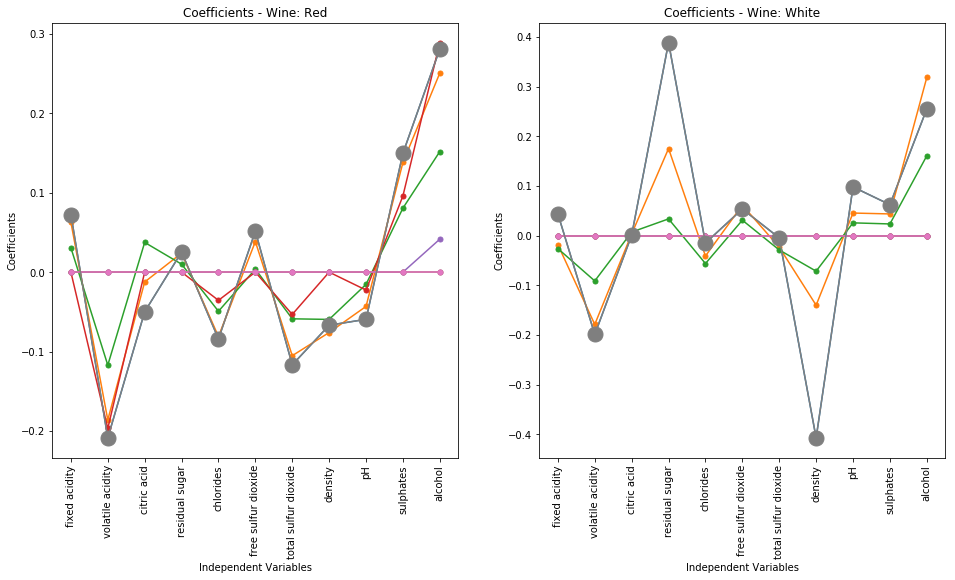

In [57]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))

ax1.plot(Coef_r, marker='o', markersize=5)
ax1.plot(Coef_r["Linear"], marker='o', markersize=15) # Linear
ax1.set_title('Coefficients - Wine: Red')
ax1.set_ylabel('Coefficients')
ax1.set_xlabel('Independent Variables')
ax1.set_xticklabels(Coef_r.index, rotation=90)


ax2.plot(Coef_w, marker='o', markersize=5)
ax2.plot(Coef_w["Linear"], marker='o', markersize=15) # Linear
ax2.set_title('Coefficients - Wine: White')
ax2.set_ylabel('Coefficients')
ax2.set_xlabel('Independent Variables')
ax2.set_xticklabels(Coef_w.index, rotation=90)

f.show()

As the graphic above shows, the linear model (the grey line with the biggest marker) have the extreme (or lower/higher) coefficients.

For the other models, the coefficient values are between zero and the barrier given by the linear model.

* #### Evaluate the RMSE

In [58]:
print("RMSE for Wine type: RED")
print("\n")
print("Linear : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, linreg_r.predict(X_r_s_test)))))
print("Ridger - alpha = 0.1 : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, ridgereg_r01.predict(X_r_s_test)))))
print("Ridger - alpha = 1 : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, ridgereg_r1.predict(X_r_s_test)))))
print("Lasso - alpha = 0.001  : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, lassoreg_r0001.predict(X_r_s_test)))))
print("Lasso - alpha = 0.01  : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, lassoreg_r001.predict(X_r_s_test)))))
print("Lasso - alpha = 0.1  : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, lassoreg_r01.predict(X_r_s_test)))))
print("Lasso - alpha = 1  : " + str(np.sqrt(metrics.mean_squared_error(y_r_test, lassoreg_r1.predict(X_r_s_test)))))

print("\n")
print("RMSE for Wine type: WHITE")
print("\n")
print("Linear : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, linreg_r.predict(X_w_s_test)))))
print("Ridger - alpha = 0.1 : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, ridgereg_r01.predict(X_w_s_test)))))
print("Ridger - alpha = 1 : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, ridgereg_r1.predict(X_w_s_test)))))
print("Lasso - alpha = 0.001  : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, lassoreg_r0001.predict(X_w_s_test)))))
print("Lasso - alpha = 0.01  : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, lassoreg_r001.predict(X_w_s_test)))))
print("Lasso - alpha = 0.1  : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, lassoreg_r01.predict(X_w_s_test)))))
print("Lasso - alpha = 1  : " + str(np.sqrt(metrics.mean_squared_error(y_w_test, lassoreg_r1.predict(X_w_s_test)))))

RMSE for Wine type: RED


Linear : 0.6217566937621426
Ridger - alpha = 0.1 : 0.6205118061816136
Ridger - alpha = 1 : 0.641631672790898
Lasso - alpha = 0.001  : 0.6218390494553881
Lasso - alpha = 0.01  : 0.7496394174044155
Lasso - alpha = 0.1  : 0.7685614096815536
Lasso - alpha = 1  : 0.7685614096815536


RMSE for Wine type: WHITE


Linear : 0.8101067966827036
Ridger - alpha = 0.1 : 0.8073050386226716
Ridger - alpha = 1 : 0.8173488199348091
Lasso - alpha = 0.001  : 0.7975980156786885
Lasso - alpha = 0.01  : 0.8815741740921464
Lasso - alpha = 0.1  : 0.8990355830242747
Lasso - alpha = 1  : 0.8990355830242747


It's hard to determinate which is the model with the best prediction (or lower RMSE) since depends of the type of wine!
That means that there is not a better or worst model. Depends about the dataset and situation!

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

* #### Create a binary target

In [59]:
winelg = data

winelg_r = winelg[winelg['type'] == 'red']
winelg_w = winelg[winelg['type'] == 'white']

winelg_r.reset_index(inplace=True)
winelg_w.reset_index(inplace=True)

# Create the binary target
winelg_r["target"] = winelg_r['quality'] >= 7
winelg_w["target"] = winelg_w['quality'] >= 7

In [60]:
winelg_r.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,target
0,4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False
1,4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,False
2,4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,False
3,4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,False
4,4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False


In [61]:
winelg_w.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,target
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,False
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,False
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,False
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,False
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,False


* #### Train a logistic regression to predict wine quality (binary)

In [62]:
X_winelg_r = winelg_r.drop(['index','quality','type','target'],axis=1)
X_winelg_w = winelg_w.drop(['index','quality','type','target'],axis=1)

y_winelg_r = winelg_r['target']
y_winelg_w = winelg_w['target']

In [63]:
from sklearn.model_selection import train_test_split

X_winelg_r_train, X_winelg_r_test, y_winelg_r_train, y_winelg_r_test = train_test_split(X_winelg_r, y_winelg_r, random_state=1)
X_winelg_w_train, X_winelg_w_test, y_winelg_w_train, y_winelg_w_test = train_test_split(X_winelg_w, y_winelg_w, random_state=1)

In [64]:
from sklearn.linear_model import LogisticRegression

# build a logistic regression model

logregr = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logregr.fit(X_winelg_r_train, y_winelg_r_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [65]:
logregw = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logregw.fit(X_winelg_w_train, y_winelg_w_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_winelg_r_pred = logregr.predict(X_winelg_r_test)
y_winelg_w_pred = logregr.predict(X_winelg_w_test)

print("\n")
print("Accuracy of the Logistic model is: ")
# print("Wine = Red: " + str(metrics.accuracy_score(y_winelg_r_test, y_winelg_r_pred)))
print("Wine = White: " + str(metrics.accuracy_score(y_winelg_w_test, y_winelg_w_pred)))



Accuracy of the Logistic model is: 
Wine = White: 0.7918367346938775


* #### Analyze the coefficients

In [67]:
coef_log_r = logregr.coef_
coef_log_r = pd.DataFrame(coef_log_r).T

In [68]:
coef_log_w = logregw.coef_
coef_log_w = pd.DataFrame(coef_log_w).T

In [69]:
X_winelg_r.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

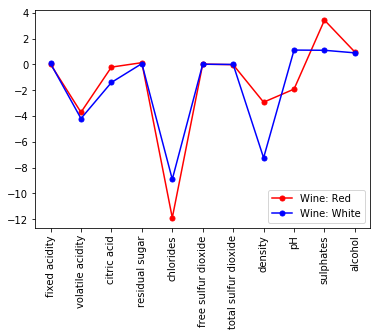

In [70]:
x1 = np.arange(coef_log_r.shape[0])
x2 = np.arange(coef_log_w.shape[0])

plt.plot(x1, coef_log_r, marker='o', color="red", markersize=5)
plt.plot(x2, coef_log_w, marker='o', color="blue", markersize=5)
plt.xticks(np.arange(len(X_winelg_r.columns)), X_winelg_r.columns, rotation=90 )
plt.legend(('Wine: Red', 'Wine: White'),loc='lower right')
plt.show()

* #### Evaluate the f1score

In [71]:
y_winelg_r_pred = logregr.predict(X_winelg_r_test)
y_winelg_w_pred = logregw.predict(X_winelg_w_test)

print("\n")
print(" f1score of the Logistic model is: ")
print("Wine = Red: " + str(metrics.f1_score(y_winelg_r_test, y_winelg_r_pred)))
print("Wine = White: " + str(metrics.f1_score(y_winelg_w_test, y_winelg_w_pred)))



 f1score of the Logistic model is: 
Wine = Red: 0.37333333333333335
Wine = White: 0.36082474226804123


# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [72]:
# Parameters to interate.

C_param = [0.001, 0.01, 0.1, 1, 10, 100]
penalty_param = ['l1','l2']

* #### f1score comparisson

In [73]:
R_log_f1 = np.zeros((len(C_param), len(penalty_param)))

for i in range(len(C_param)):
    for j in range(len(penalty_param)):
        
        logr = LogisticRegression(C=C_param[i], penalty=penalty_param[j], solver='liblinear',multi_class='ovr')
        logr.fit(X_winelg_r_train, y_winelg_r_train) 
        R_log_f1[i,j] = metrics.f1_score(y_winelg_r_test, logr.predict(X_winelg_r_test))

Matrix_R_logf1 = pd.DataFrame(R_log_f1)
Matrix_R_logf1

,0,1
0,0.000000,0.000000
1,0.000000,0.000000
2,0.245614,0.117647
3,0.405405,0.422535
4,0.356164,0.405405
5,0.378378,0.356164


In [74]:
W_log_f1 = np.zeros((len(C_param), len(penalty_param)))

for i in range(len(C_param)):
    for j in range(len(penalty_param)):
        
        logw = LogisticRegression(C=C_param[i], penalty=penalty_param[j], solver='liblinear',multi_class='ovr')
        logw.fit(X_winelg_w_train, y_winelg_w_train) 
        W_log_f1[i,j] = metrics.f1_score(y_winelg_w_test, logw.predict(X_winelg_w_test))

Matrix_W_logf1 = pd.DataFrame(W_log_f1)
Matrix_W_logf1

,0,1
0,0.000000,0.014235
1,0.041237,0.181818
2,0.262570,0.288089
3,0.354167,0.358839
4,0.354756,0.374359
5,0.356589,0.365482


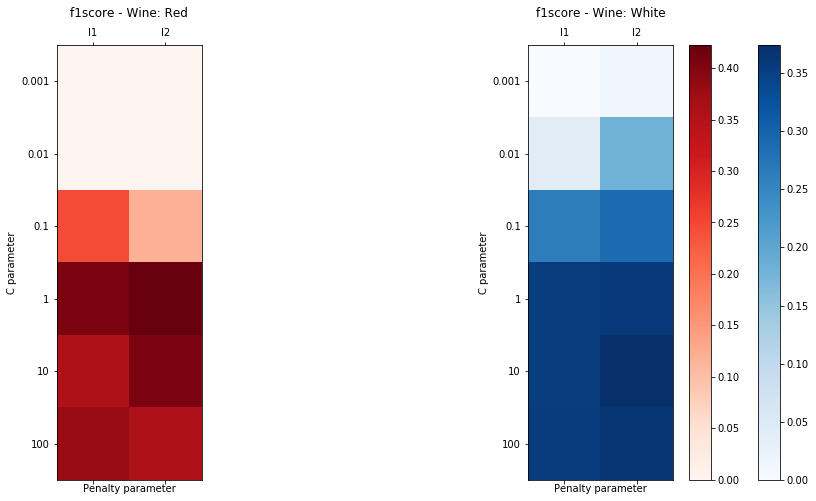

In [75]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))

Ax1 = ax1.matshow(Matrix_R_logf1, cmap=plt.cm.Reds)
ax1.set_title('f1score - Wine: Red')
ax1.set_xlabel('Penalty parameter')
ax1.set_ylabel('C parameter')
ax1.set_xticks(np.arange(len(penalty_param)))
ax1.set_yticks(np.arange(len(C_param)))
ax1.set_xticklabels(penalty_param)
ax1.set_yticklabels(C_param)


Ax2 = ax2.matshow(Matrix_W_logf1, cmap=plt.cm.Blues)
ax2.set_title('f1score - Wine: White')
ax2.set_xlabel('Penalty parameter')
ax2.set_ylabel('C parameter')
ax2.set_xticks(np.arange(len(penalty_param)))
ax2.set_yticks(np.arange(len(C_param)))
ax2.set_xticklabels(penalty_param)
ax2.set_yticklabels(C_param)

f.colorbar(Ax2)
f.colorbar(Ax1)

f.show()

According to this result, the penalty "l2" shows better results (f1score is bigger with l2. Fore more details about the f1score metric, [click here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

* #### Coefficients comparisson

    Coefficients for Wines type "Red".

In [76]:
R_log_coef_ = np.zeros(len(C_param))
R_log_coef = pd.DataFrame()

# penalty l1
for i in range(len(C_param)):
    logrl1_coef = LogisticRegression(C=C_param[i], penalty=penalty_param[0], solver='liblinear',multi_class='ovr')
    logrl1_coef.fit(X_winelg_r_train, y_winelg_r_train) 
    R_log_coef_ = pd.DataFrame(logrl1_coef.coef_)

R_log_coef = R_log_coef_.T

# penalty l2
for i in range(len(C_param)):
    logrl2_coef = LogisticRegression(C=C_param[i], penalty=penalty_param[1], solver='liblinear',multi_class='ovr')
    logrl2_coef.fit(X_winelg_r_train, y_winelg_r_train) 
    R_log_coef_ = pd.DataFrame(logrl2_coef.coef_)
    
R_log_coef[1] = R_log_coef_.T

R_log_coef

,0,1
0,0.025897,0.013508
1,-3.702170,-3.771160
2,-0.161648,-0.235092
3,0.133827,0.130016
4,-11.928326,-9.952926
5,0.023028,0.023176
6,-0.021830,-0.021759
7,-2.983370,-3.005384
8,-1.643427,-1.859308
9,3.445648,3.417300


    Coefficients for Wines type "Red".

In [77]:
W_log_coef_ = np.zeros(len(C_param))
W_log_coef = pd.DataFrame()

# penalty l1
for i in range(len(C_param)):
    logwl1_coef = LogisticRegression(C=C_param[i], penalty=penalty_param[0], solver='liblinear',multi_class='ovr')
    logwl1_coef.fit(X_winelg_w_train, y_winelg_w_train) 
    W_log_coef_ = pd.DataFrame(logwl1_coef.coef_)

W_log_coef = W_log_coef_.T

# penalty l2
for i in range(len(C_param)):
    logwl1_coef = LogisticRegression(C=C_param[i], penalty=penalty_param[1], solver='liblinear',multi_class='ovr')
    logwl1_coef.fit(X_winelg_w_train, y_winelg_w_train) 
    W_log_coef_ = pd.DataFrame(logwl1_coef.coef_)

W_log_coef[1] = W_log_coef_.T

W_log_coef

,0,1
0,0.062991,0.118437
1,-3.829885,-3.914269
2,-0.888083,-1.130774
3,0.060736,0.064183
4,-21.995403,-7.225919
5,0.012610,0.013383
6,-0.002796,-0.003447
7,-6.791370,-8.235978
8,1.178323,1.537070
9,1.082376,1.023947


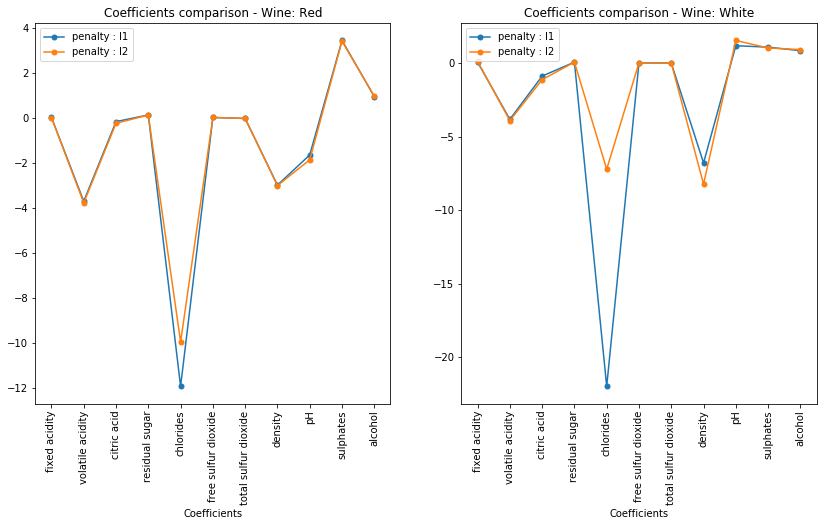

In [78]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 7))

ax1.plot(R_log_coef, marker='o', markersize=5)
ax1.set_title('Coefficients comparison - Wine: Red')
ax1.set_xlabel('Coefficients')
ax1.set_xticks( np.arange(X_winelg_r.shape[1]))
ax1.set_xticklabels( X_winelg_r.columns, rotation=90)
ax1.legend(["penalty : l1","penalty : l2"])


ax2.plot(W_log_coef, marker='o', markersize=5)
ax2.set_title('Coefficients comparison - Wine: White')
ax2.set_xlabel('Coefficients')
ax2.set_xticks( np.arange(X_winelg_w.shape[1]))
ax2.set_xticklabels( X_winelg_w.columns, rotation=90)
ax2.legend(["penalty : l1","penalty : l2"])

f.show()

As per this result, the only coefficent that differs between penalties is "chlorides" and, in particular, is the lowest coefficient in terms to determinate if a wine have a good quality (according to the threshold defined at the begging of this notebook).